# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [16]:
import matplotlib.pyplot as plt                          # Dependencies and Setup
import pandas as pd
import numpy as np
import requests, json
from datetime import datetime
from scipy import stats
import random
from citipy import citipy 

from config import api_key                               # Import API key

#from jupyterthemes import jtplot
#jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

output_data_file = "output_data/cities_weather_data.csv" # Output File (CSV)

pd.options.display.float_format = '{:,.2f}'.format       # Some basic formatting for dataframes

## Generate Cities List

In [4]:
# Generate random coordinates and list of corresponding cities

cities = []                                                # Create empty list for cities
countries = []                                             # and countries

for i in range(1, 1100):                                   # Note that I limit the latitude range a little.
    lat_coord  = round(random.uniform(-60,75), 2)          # Antarctica and deep arctic aren't very useful and                     
    long_coord = round(random.uniform(-180, 180), 2)       # skew the results with overepresented cities in 
                                                           # far north and south
    city = citipy.nearest_city(lat_coord, long_coord)      # Use Citipy to get name of city nearest the randomly
                                                           # chosen coordinates
    if city.city_name.title() not in cities:               # Add unique cities to list of cities
        cities.append(city.city_name.title()) 
        countries.append(city.country_code.upper())        # and grab their country codes too

print(f"Number of cities in list: {len(cities)}")          # Print the city count to confirm sufficient count


Number of cities in list: 582


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Get weather data from OpenWeather API

url = "http://api.openweathermap.org/data/2.5/weather?"        # Base url for OW
units = "metric"                                               # Set units to request

query_url = f"{url}appid={api_key}&units={units}&q="           # Build the query URL

lats = []                                                      # Set up lists to hold reponse info
longs = []
temps = []
humids = []
cloudies = []
wind_speeds = []
dates = []

i = 1                                                          # Start a counter so that the print includes count

for city in cities:                                            # Loop through the list of cities 
                                                               # and perform a request for data on each
    response = requests.get(query_url + city).json()           # Get response and convert to json

    try:
        lat = response['coord']['lat']                         # Not all cities found in Citipy have data in 
        lng = response['coord']['lon']                        # OpenWeather. So this 'try' block will look for 
        temp = round(response['main']['temp_max'])                 # the data and set the respective variables...
        humid = response['main']['humidity']                    
        cloud = response['clouds']['all']
        wind = response['wind']['speed']
        date = datetime.fromtimestamp(response['dt']).strftime('%d/%m/%y')  # Converts and formats timestamps
    
    except KeyError:                                           # ...And this 'except' block will set variables to 
        lat = np.nan                                           # np.nan for those cities that lack data. That way the
        lng = np.nan                                           # program won't blow up and later it will be easy to 
        temp = np.nan                                          # drop rows with missing data.                                           
        humid = np.nan                                           
        cloud = np.nan
        wind = np.nan
        date = np.nan
    
    lats.append(lat)                                           # Append data to respective lists
    longs.append(lng)
    temps.append(temp)
    humids.append(humid)
    cloudies.append(cloud)
    wind_speeds.append(wind)
    dates.append(date)
    
    # Print the data being processed
    print (f"{i}: {city} lat: {lat}, lng: {lng}, temp: {temp}, humidity: {humid}, cloudiness: {cloud}, wind speed: {wind}")
    i+=1

1: Cherskiy lat: 68.75, lng: 161.3, temp: -16, humidity: 96, cloudiness: 32, wind speed: 2.64
2: Chivay lat: -15.6383, lng: -71.6011, temp: 13, humidity: 35, cloudiness: 7, wind speed: 1.9
3: Rikitea lat: -23.1203, lng: -134.9692, temp: 25, humidity: 71, cloudiness: 48, wind speed: 3.53
4: Roseburg lat: 43.2165, lng: -123.3417, temp: 9, humidity: 87, cloudiness: 90, wind speed: 1.54
5: Saint-Georges lat: 12.0564, lng: -61.7485, temp: 29, humidity: 74, cloudiness: 40, wind speed: 9.26
6: Omboue lat: -1.5746, lng: 9.2618, temp: 27, humidity: 78, cloudiness: 100, wind speed: 2.19
7: Ingham lat: 42.6, lng: -84.3833, temp: 22, humidity: 52, cloudiness: 1, wind speed: 2.57
8: Port Hardy lat: 50.6996, lng: -127.4199, temp: 8, humidity: 93, cloudiness: 90, wind speed: 1.54
9: Cape Town lat: -33.9258, lng: 18.4232, temp: 18, humidity: 72, cloudiness: 0, wind speed: 5.66
10: Maiduguri lat: 11.8464, lng: 13.1603, temp: 40, humidity: 7, cloudiness: 15, wind speed: 7.11
11: Jiuquan lat: 39.7432, ln

85: Inongo lat: -1.95, lng: 18.2667, temp: 27, humidity: 72, cloudiness: 13, wind speed: 1.36
86: Nanortalik lat: 60.1432, lng: -45.2371, temp: 2, humidity: 87, cloudiness: 26, wind speed: 4.06
87: Avarua lat: -21.2078, lng: -159.775, temp: 21, humidity: 100, cloudiness: 99, wind speed: 0.51
88: Hami lat: 42.8, lng: 93.45, temp: 15, humidity: 16, cloudiness: 45, wind speed: 1.8
89: Saint-Augustin lat: 51.226, lng: -58.6502, temp: 3, humidity: 96, cloudiness: 100, wind speed: 9.12
90: Changji lat: 44.0167, lng: 87.3167, temp: 18, humidity: 20, cloudiness: 0, wind speed: 1
91: Hermanus lat: -34.4187, lng: 19.2345, temp: 18, humidity: 79, cloudiness: 94, wind speed: 2.73
92: Atasu lat: 48.6814, lng: 71.6433, temp: 18, humidity: 28, cloudiness: 91, wind speed: 4.97
93: Samusu lat: nan, lng: nan, temp: nan, humidity: nan, cloudiness: nan, wind speed: nan
94: Thompson lat: 55.7435, lng: -97.8558, temp: -6, humidity: 73, cloudiness: 75, wind speed: 7.72
95: Alanya lat: 36.5438, lng: 31.9998, 

169: Gagra lat: 43.3283, lng: 40.2239, temp: 12, humidity: 82, cloudiness: 75, wind speed: 2
170: Kem lat: 64.9555, lng: 34.5793, temp: 0, humidity: 65, cloudiness: 98, wind speed: 2.74
171: San Ramon lat: 37.7799, lng: -121.978, temp: 13, humidity: 81, cloudiness: 1, wind speed: 2.06
172: Anadyr lat: 64.75, lng: 177.4833, temp: -2, humidity: 100, cloudiness: 75, wind speed: 1.91
173: Mantua lat: 45.1667, lng: 10.7833, temp: 14, humidity: 80, cloudiness: 100, wind speed: 1.34
174: Xiongzhou lat: 25.1167, lng: 114.3, temp: 19, humidity: 98, cloudiness: 100, wind speed: 1.11
175: Luena lat: -11.7833, lng: 19.9167, temp: 24, humidity: 69, cloudiness: 40, wind speed: 3.6
176: Manzil Tamim lat: nan, lng: nan, temp: nan, humidity: nan, cloudiness: nan, wind speed: nan
177: La Ronge lat: 55.1001, lng: -105.2842, temp: -8, humidity: 53, cloudiness: 100, wind speed: 5.14
178: Yulara lat: -25.2406, lng: 130.9889, temp: 15, humidity: 38, cloudiness: 0, wind speed: 3.09
179: Coquimbo lat: -29.9533

253: Hualmay lat: -11.0964, lng: -77.6139, temp: 22, humidity: 73, cloudiness: 97, wind speed: 5.7
254: Pocatello lat: 42.8713, lng: -112.4455, temp: 3, humidity: 81, cloudiness: 75, wind speed: 4.12
255: Viligili lat: nan, lng: nan, temp: nan, humidity: nan, cloudiness: nan, wind speed: nan
256: San Patricio lat: 28.017, lng: -97.5169, temp: 28, humidity: 78, cloudiness: 90, wind speed: 6.69
257: Luderitz lat: -26.6481, lng: 15.1594, temp: 19, humidity: 71, cloudiness: 3, wind speed: 6
258: Oyama lat: 36.3, lng: 139.8, temp: 18, humidity: 93, cloudiness: 20, wind speed: 0.51
259: Richards Bay lat: -28.783, lng: 32.0377, temp: 24, humidity: 57, cloudiness: 78, wind speed: 2.54
260: Mandan lat: 46.8267, lng: -100.8896, temp: 12, humidity: 100, cloudiness: 1, wind speed: 2.06
261: Ribeira Grande lat: 38.5167, lng: -28.7, temp: 19, humidity: 55, cloudiness: 75, wind speed: 4.12
262: Tiksi lat: 71.6872, lng: 128.8694, temp: -20, humidity: 99, cloudiness: 58, wind speed: 2.87
263: Margate l

337: Banbury lat: 52.0602, lng: -1.3403, temp: 12, humidity: 63, cloudiness: 97, wind speed: 1.85
338: Rungata lat: nan, lng: nan, temp: nan, humidity: nan, cloudiness: nan, wind speed: nan
339: Tabiauea lat: nan, lng: nan, temp: nan, humidity: nan, cloudiness: nan, wind speed: nan
340: Sicuani lat: -14.2694, lng: -71.2261, temp: 13, humidity: 53, cloudiness: 46, wind speed: 2.92
341: Iqaluit lat: 63.7506, lng: -68.5145, temp: -6, humidity: 68, cloudiness: 1, wind speed: 1.54
342: Ondorhaan lat: nan, lng: nan, temp: nan, humidity: nan, cloudiness: nan, wind speed: nan
343: Fukue lat: 32.6881, lng: 128.8419, temp: 16, humidity: 87, cloudiness: 100, wind speed: 2.54
344: Batagay lat: 67.6333, lng: 134.6333, temp: -8, humidity: 97, cloudiness: 100, wind speed: 2.26
345: Bathsheba lat: 13.2167, lng: -59.5167, temp: 29, humidity: 54, cloudiness: 20, wind speed: 8.75
346: Lazaro Cardenas lat: 17.9583, lng: -102.2, temp: 30, humidity: 48, cloudiness: 81, wind speed: 1.38
347: Chulman lat: 56.

421: Caraballeda lat: 10.6112, lng: -66.8522, temp: 28, humidity: 74, cloudiness: 40, wind speed: 1.54
422: Peniche lat: 39.3558, lng: -9.3811, temp: 18, humidity: 79, cloudiness: 17, wind speed: 4.02
423: Ikom lat: 5.9667, lng: 8.7063, temp: 30, humidity: 81, cloudiness: 99, wind speed: 1.06
424: Kozan lat: 37.4552, lng: 35.8157, temp: 23, humidity: 56, cloudiness: 0, wind speed: 4.63
425: Odweyne lat: 9.4092, lng: 45.064, temp: 28, humidity: 41, cloudiness: 52, wind speed: 4.99
426: Lodja lat: -3.4833, lng: 23.4333, temp: 27, humidity: 71, cloudiness: 97, wind speed: 0.8
427: Rawson lat: -43.3002, lng: -65.1023, temp: 22, humidity: 30, cloudiness: 63, wind speed: 7.13
428: Presidente Venceslau lat: -21.8761, lng: -51.8439, temp: 26, humidity: 34, cloudiness: 0, wind speed: 4.63
429: Nioro lat: 13.35, lng: -15.75, temp: 39, humidity: 12, cloudiness: 6, wind speed: 3.41
430: Buchanan lat: 5.8808, lng: -10.0467, temp: 30, humidity: 79, cloudiness: 75, wind speed: 3.6
431: Vestmannaeyjar

505: Farah lat: 32.5, lng: 62.5, temp: 29, humidity: 12, cloudiness: 30, wind speed: 1.77
506: Palmer lat: 42.1584, lng: -72.3287, temp: 11, humidity: 31, cloudiness: 75, wind speed: 1.54
507: Camacupa lat: -12.0167, lng: 17.4833, temp: 23, humidity: 58, cloudiness: 26, wind speed: 0.42
508: Armacao Dos Buzios lat: nan, lng: nan, temp: nan, humidity: nan, cloudiness: nan, wind speed: nan
509: Veraval lat: 20.9, lng: 70.3667, temp: 28, humidity: 74, cloudiness: 1, wind speed: 3.71
510: Jacmel lat: 18.2342, lng: -72.5347, temp: 32, humidity: 45, cloudiness: 10, wind speed: 3.6
511: Vandavasi lat: 12.5, lng: 79.6167, temp: 29, humidity: 71, cloudiness: 0, wind speed: 3.72
512: Coro lat: 11.4045, lng: -69.6734, temp: 30, humidity: 61, cloudiness: 73, wind speed: 7.95
513: Khonuu lat: nan, lng: nan, temp: nan, humidity: nan, cloudiness: nan, wind speed: nan
514: Marzuq lat: 14.4, lng: 46.4667, temp: 25, humidity: 62, cloudiness: 68, wind speed: 3.33
515: Arlit lat: 18.7369, lng: 7.3853, tem

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [17]:
#Build a new data frame with with weather data

weather_data_df = pd.DataFrame({"City" : cities,                                # Build the dataframe
                                "Country Code" : countries,
                                "Latitude": lats,
                                "Degrees From Equator": list(map(abs, lats)),   # The intention of the 'Degrees from 
                                "Longitude" : longs,                            # Equator' column isto establish an
                                "Temperature" : temps,                          # absolute value of the latitude, or 
                                "Humidity" : humids,                            # basically the distance from equator
                                "Cloudiness" : cloudies,                        # This will come in handy later for
                                "Wind Speed" : wind_speeds,                     # plotting 
                                "Date" : dates
                              })                          

count1 = len(weather_data_df)                                                   # Count cities in dataframe  
print(f"Number of cities in dataframe: {count1}")                               # Print count 
weather_data_df.head()                                                          # Show the head sample 


Number of cities in dataframe: 582


,City,Country Code,Latitude,Degrees From Equator,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Date
0,Cherskiy,RU,68.75,68.75,161.30,-16.00,96.00,32.00,2.64,27/04/21
1,Chivay,PE,-15.64,15.64,-71.60,13.00,35.00,7.00,1.90,27/04/21
2,Rikitea,PF,-23.12,23.12,-134.97,25.00,71.00,48.00,3.53,27/04/21
3,Roseburg,US,43.22,43.22,-123.34,9.00,87.00,90.00,1.54,27/04/21
4,Saint-Georges,GF,12.06,12.06,-61.75,29.00,74.00,40.00,9.26,27/04/21


In [18]:
# Remove cities with missing weather data from dataframe and save the data in a .csv file

clean_weather_data_df= weather_data_df.dropna(how='any')          # Use .dropna() to remove rows with missing data


clean_weather_data_df.to_csv(output_data_file, index=False)       # Save the dataframe above to .csv file

count2 = len(clean_weather_data_df)                               # Get a new city count
print(f"{count1 - count2} cities were removed. Number of cities in cleaned dataframe: {count2}") #Print the updated count
clean_weather_data_df.head()                                      # Show the head sample 

52 cities were removed. Number of cities in cleaned dataframe: 530


,City,Country Code,Latitude,Degrees From Equator,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Date
0,Cherskiy,RU,68.75,68.75,161.30,-16.00,96.00,32.00,2.64,27/04/21
1,Chivay,PE,-15.64,15.64,-71.60,13.00,35.00,7.00,1.90,27/04/21
2,Rikitea,PF,-23.12,23.12,-134.97,25.00,71.00,48.00,3.53,27/04/21
3,Roseburg,US,43.22,43.22,-123.34,9.00,87.00,90.00,1.54,27/04/21
4,Saint-Georges,GF,12.06,12.06,-61.75,29.00,74.00,40.00,9.26,27/04/21


In [19]:
# Perform statistical check

weather_data_df.describe()

,Latitude,Degrees From Equator,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
count,530.00,530.00,530.00,530.00,530.00,530.00,530.00
mean,20.39,32.91,19.28,17.28,65.21,53.19,3.45
std,32.45,19.61,86.94,12.12,24.62,38.19,2.11
min,-54.80,0.45,-179.17,-20.00,5.00,0.00,0.09
25%,-5.47,16.88,-52.63,9.00,51.00,13.00,1.90
50%,25.08,32.80,21.96,19.00,71.00,65.00,3.01
75%,46.53,47.41,90.19,27.00,84.75,90.00,4.63
max,77.48,77.48,179.32,42.00,100.00,100.00,10.80


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [20]:
#  Get the indices of cities that have humidity over 100%.

outliers = clean_weather_data_df.loc[weather_data_df['Humidity'] > 100]
outliers

,City,Country Code,Latitude,Degrees From Equator,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Date


In [21]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.

clean_weather_data_df = weather_data_df.loc[weather_data_df['Humidity'] <= 100]
clean_weather_data_df.head()

,City,Country Code,Latitude,Degrees From Equator,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Date
0,Cherskiy,RU,68.75,68.75,161.30,-16.00,96.00,32.00,2.64,27/04/21
1,Chivay,PE,-15.64,15.64,-71.60,13.00,35.00,7.00,1.90,27/04/21
2,Rikitea,PF,-23.12,23.12,-134.97,25.00,71.00,48.00,3.53,27/04/21
3,Roseburg,US,43.22,43.22,-123.34,9.00,87.00,90.00,1.54,27/04/21
4,Saint-Georges,GF,12.06,12.06,-61.75,29.00,74.00,40.00,9.26,27/04/21


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [22]:
# Set up some basic plt formatting configurations

plt.rc('font', size=12)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=20)

# Create a function to match labels to a the correlation r coefficients. This will come in handy below 

def r_label(r):
    abs_r = abs(r)
    if abs_r >= .8 : return "Very Strong"
    elif abs_r >= .6 : return "Strong"
    elif abs_r >= .4: return "Moderate"
    elif abs_r >= .2: return "Low"
    else: return "Negligible"

# Set up list of variables to compare with latitude. This gets plugged into a for-loop in the following sections

master_plot_list = ["Temperature", "Humidity", "Cloudiness", "Wind Speed"]   
date = clean_weather_data_df['Date'][0]                                                                         

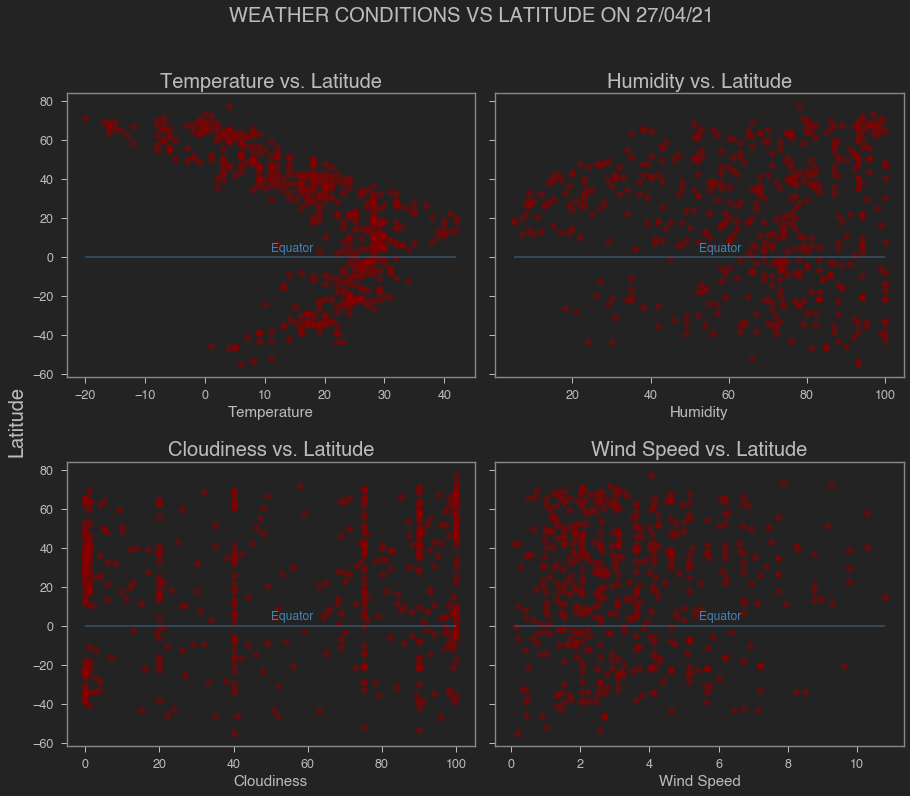

In [23]:
                # PLOTTING WEATHER CONDITIONS VS. LATITUDE USING A FOR LOOP   

fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2,2, sharey='row', figsize=(15,12))    # Set up figure for subplots

plot_list = [ax0, ax1, ax2, ax3]                                # Set up list of plots to help with the for loop below

plt.subplots_adjust(hspace=.3, wspace=0.05)                     # Formatting        
fig.suptitle(f"WEATHER CONDITIONS VS LATITUDE ON {date}", ha='center', size=20)     # Set title for the whole figure

fig.text(.07, .5, "Latitude",           # Set label for shared y axis. This seemed to be
         va='center', rotation='vertical', fontsize=20,         # the easiest way. 
         linespacing = 2)  

for i in range (4):                                             # Aaaaaand.Here.We.Go!

    x_axis_name = master_plot_list[i]                           # Set name of x axis for the sake of labels
    x_axis = clean_weather_data_df[x_axis_name]                 # Set up x axis values 
    y_axis = clean_weather_data_df["Latitude"]      # Set up y axis values 

    slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_axis, y_axis)  # Get elements of regression equation
    regress_values = x_axis * slope + intercept                 # Calculate regression values
              
    plot_list[i].set_xlabel(f"{x_axis_name}")                   # Set x axis label for subplot                  
    plot_list[i].set_title(f"{x_axis_name} vs. Latitude")       # Set title for subplot
    
    r = round(stats.pearsonr(x_axis, y_axis)[0],2)              # Calculate correlation coefficient
    rlabel = r_label(r)                                         # Call function to create a label for the r number

    plot_list[i].scatter(x_axis, y_axis, facecolors="darkred",  alpha=.5,)     # Plot the scatter chart
                                               
    plot_list[i].hlines(0, x_axis.min(), x_axis.max(), alpha=.5, color='steelblue')
    plot_list[i].annotate('Equator', ((x_axis.min()+x_axis.max())/2, 3), alpha=1, color='steelblue')
                                               
plt.savefig("output_data/weather-conditions-vs-latitude.png")                # Save the png file   

plt.show()


                                      CONCLUSIONS
As you can see from the charts above, the correlation between temperature and distance from the equator (i.e., positive and negative latitudes) is very strong, supporting the assertion that climates get warmer as you get closer to the equator. 

All other weather conditions (humidity, cloudiness and wind speed) have negligible correlations. 

In [24]:
#Create new dataframes for the Northern and Southern Hemisphere cities

north_hem_df = clean_weather_data_df.loc[clean_weather_data_df['Latitude'] > 0, ].reset_index(drop=True)

south_hem_df = clean_weather_data_df.loc[clean_weather_data_df['Latitude'] <= 0, ].reset_index(drop=True)

south_hem_df.head()

,City,Country Code,Latitude,Degrees From Equator,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Date
0,Chivay,PE,-15.64,15.64,-71.60,13.00,35.00,7.00,1.90,27/04/21
1,Rikitea,PF,-23.12,23.12,-134.97,25.00,71.00,48.00,3.53,27/04/21
2,Omboue,GA,-1.57,1.57,9.26,27.00,78.00,100.00,2.19,27/04/21
3,Cape Town,ZA,-33.93,33.93,18.42,18.00,72.00,0.00,5.66,27/04/21
4,Atuona,PF,-9.80,9.80,-139.03,26.00,71.00,98.00,6.89,27/04/21


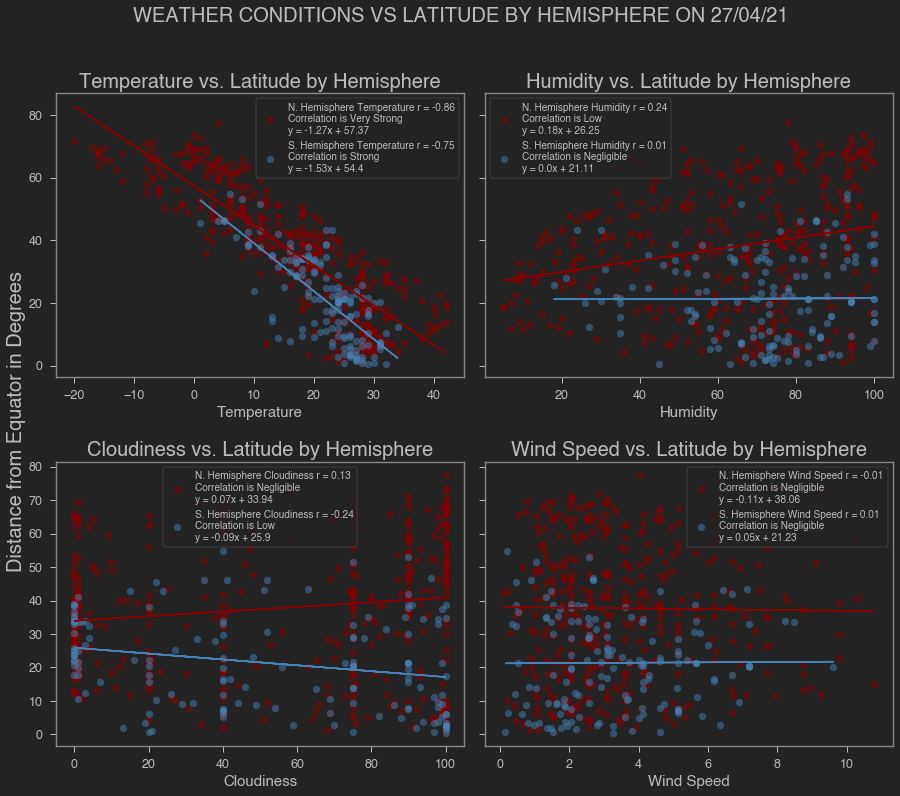

In [25]:
        # PLOTTING WEATHER CONDITIONS BY HEMISPHERE VS. LATITUDE USING A FOR LOOP

fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2,2, sharey='row', figsize=(15,12))    # Set up figure for subplots

plot_list = [ax0, ax1, ax2, ax3]                               # Set up list of plots to help with the for loop below

plt.subplots_adjust(hspace=.3, wspace=0.05)                    # Formatting
fig.suptitle(f"WEATHER CONDITIONS VS LATITUDE BY HEMISPHERE ON {date}", 
             ha='center', size=20) # Set title for the whole figure

fig.text(.08, 0.5, "Distance from Equator in Degrees",         # Set label for shared y axis. This seemed to be         
         va='center', rotation='vertical', fontsize=20)

for i in range (4):   

        # Northern Hemisphere
    north_x_axis_name = master_plot_list[i]                           # Set name of x axis for the sake of labels
    north_x_axis = north_hem_df[north_x_axis_name]                    # Set up x axis values 
    north_y_axis = north_hem_df["Degrees From Equator"]               # Set up y axis values 

    slope, intercept, rvalue, pvalue, stderr = stats.linregress(north_x_axis, north_y_axis)  # Get elements of regression equation
    north_regress_values = north_x_axis * slope + intercept           # Calculate regression values

    north_r = round(stats.pearsonr(north_x_axis, north_y_axis)[0],2)  # Calculate correlation coefficient
    north_r_label = r_label(north_r)                                  # Call function to create a label for the r number                                
    north_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Southern Hemisphere
    south_x_axis_name = master_plot_list[i]                           # Set name of x axis for the sake of labels
    south_x_axis = south_hem_df[south_x_axis_name]                    # Set up x axis values 
    south_y_axis = south_hem_df["Degrees From Equator"]               # Set up y axis values 
    
    slope, intercept, rvalue, pvalue, stderr = stats.linregress(south_x_axis, south_y_axis)  # Get elements of regression equation
    south_regress_values = south_x_axis * slope + intercept                 # Calculate regression values   
    
    south_r = round(stats.pearsonr(south_x_axis, south_y_axis)[0],2)  # Calculate correlation coefficient
    south_r_label = r_label(south_r)                                  # Call function to create a label for the r number
    
    # Formatting
    plot_list[i].set_xlabel(f"{north_x_axis_name}")                   # Set x axis label for subplot              
    plot_list[i].set_title(f"{north_x_axis_name} vs. Latitude by Hemisphere") # Set title for subplot 
    south_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
        
    # Plotting
        # Northern Hemisphere
    plot_list[i].scatter(north_x_axis, north_y_axis, facecolors="darkred",  alpha=.5,     # Plot the scatter chart
        label=f"N. Hemisphere {north_x_axis_name} r = {north_r}\nCorrelation is {north_r_label}\n{north_line_eq}")                                                  

    plot_list[i].plot(north_x_axis, north_regress_values, color="darkred")         # Plot the regression line
    
        # Southern Hemisphere
    plot_list[i].scatter(south_x_axis, south_y_axis, facecolors="steelblue",  alpha=.5,   # Plot the scatter chart
        label=f"S. Hemisphere {south_x_axis_name} r = {south_r}\nCorrelation is {south_r_label}\n{south_line_eq}")                                                 

    plot_list[i].plot(south_x_axis, south_regress_values, color="steelblue")         # Plot the regression line    
       
    plot_list[i].legend(fontsize=10)                                   # Add the legend
    
plt.savefig("output_data/weather-conditions-vs-latitude-by-hemisphere.png")        # Save the png file   

plt.show()


                                                    CONCLUSIONS
This analysis by hemisphere doesn't change the initial results. Temperature is still the only weather variable that has a strong correlation to latitude, although on several random samples, the correlation is a little stronger in one hemisphere than the other. 